# Blind Football maps

Using the BlindFootballPitch class, we will create tactical representations of the pitch. Our aim is to generate three insightful maps: an Attack Map, a Pass Map, and a Heatmap.

To achieve this, we will utilize a DataFrame from the match between Costa Rica (CRC) and Argentina (ARG), played on August 5, 2022, as part of the World Grand Prix 2022 in the City of Puebla, Mexico.

After running the code, you can check out the highlights of the match in this [video](https://youtu.be/4QYtooMATPk?si=ahvAbM6WOBOTBL4c).

In [1]:
# Import libraries and the DataFrame to be used
import pandas as pd
from blindfootballpitch import BFpitch
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

# Load the DataFrame
match = "20220805_crc_v_arg.csv"
df = pd.read_csv(match)

# Prepare the data, separate the XY column into columns for each coordinate
df[['Xi', 'Yi', 'Xf', 'Yf']] = df['XY'].str.extract(r'(\d+);(\d+) (\d+);(\d+)', expand=True)
df = df.drop("XY", axis=1)

# Assign a negative value to NaNs to treat them as integers but not plot them
df['Xi'].fillna(-1, inplace=True)
df['Yi'].fillna(-1, inplace=True)
df['Xf'].fillna(-1, inplace=True)
df['Yf'].fillna(-1, inplace=True)

# Convert coordinates to float and adjust the scale
df['Xi'] = df['Xi'].astype(int) / 10
df['Yi'] = df['Yi'].astype(int) / 10
df['Xf'] = df['Xf'].astype(int) / 10
df['Yf'] = df['Yf'].astype(int) / 10

df

,N,Event,Period,Xi,Yi,Xf,Yf
0,1,Inicia CRC,Primer tiempo,-0.1,-0.1,-0.1,-0.1
1,1,Inicia ARG,Primer tiempo,-0.1,-0.1,-0.1,-0.1
2,1,Posesión ofensiva CRC,Primer tiempo,-0.1,-0.1,-0.1,-0.1
3,1,Saque del medio CRC,Primer tiempo,-0.1,-0.1,-0.1,-0.1
4,1,Pase CRC,Primer tiempo,10.1,22.1,0.5,30.6
...,...,...,...,...,...,...,...
830,18,Intercepción CRC,Segundo tiempo,-0.1,-0.1,-0.1,-0.1
831,61,Recepción ARG,Segundo tiempo,-0.1,-0.1,-0.1,-0.1
832,89,Pase ARG,Segundo tiempo,0.4,30.5,0.4,26.4
833,62,Recepción ARG,Segundo tiempo,-0.1,-0.1,-0.1,-0.1


## Attack map

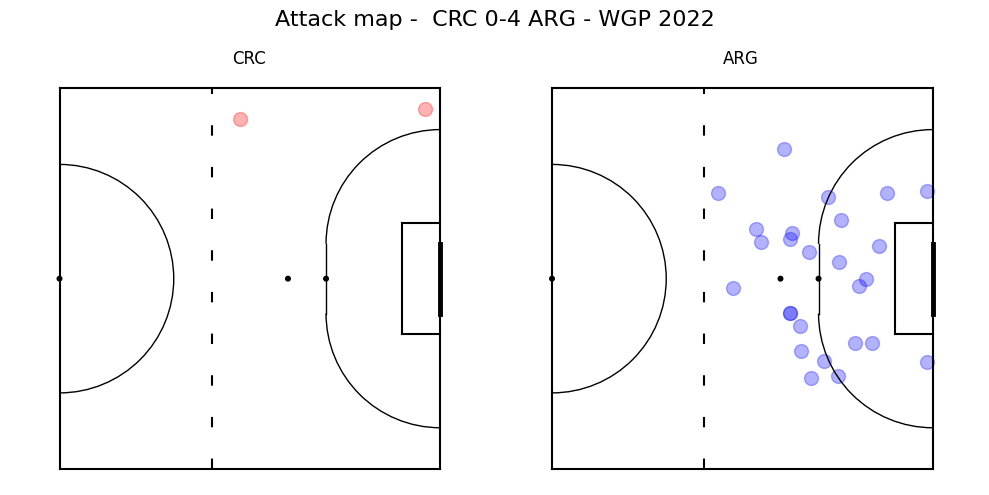

In [2]:
# Create the football pitch
pitch = BFpitch()

# Filter rows for attacks by the ARG team with positive starting coordinates
attacks_arg = df[(df['Event'] == 'Ataque ARG') & (df['Xi'] > 0) & (df['Yi'] > 0)]

# Filter rows for attacks by the CRC team with positive starting coordinates
attacks_crc = df[(df['Event'] == 'Ataque CRC') & (df['Xi'] > 0) & (df['Yi'] > 0)]

# Set up the subplot layout (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Iterate over the subplots and plot in each one
for i, ax in enumerate(axes):
    
    if i == 0:
        # Plot the attacks by the CRC team
        ax.scatter(attacks_crc['Yi'] - 20, attacks_crc['Xi'], marker='o', color='red', alpha=0.3, s=100)
        pitch.draw(half_pitch=True, ax=ax)  # Draw the pitch
        ax.set_title('CRC')  # Set the title for the subplot
        
    elif i == 1:
        # Plot the attacks by the ARG team
        ax.scatter(attacks_arg['Yi'] - 20, attacks_arg['Xi'], marker='o', color='blue', alpha=0.3, s=100)
        pitch.draw(half_pitch=True, ax=ax)  # Draw the pitch
        ax.set_title('ARG')  # Set the title for the subplot

# Adjust the general layout
plt.suptitle('Attack map -  CRC 0-4 ARG - WGP 2022', fontsize=16)  # Set the main title
plt.subplots_adjust(top=0.8)  # Adjust the position of the main title

# Adjust the general layout and display the plot
plt.tight_layout()
plt.show()


## Pass map

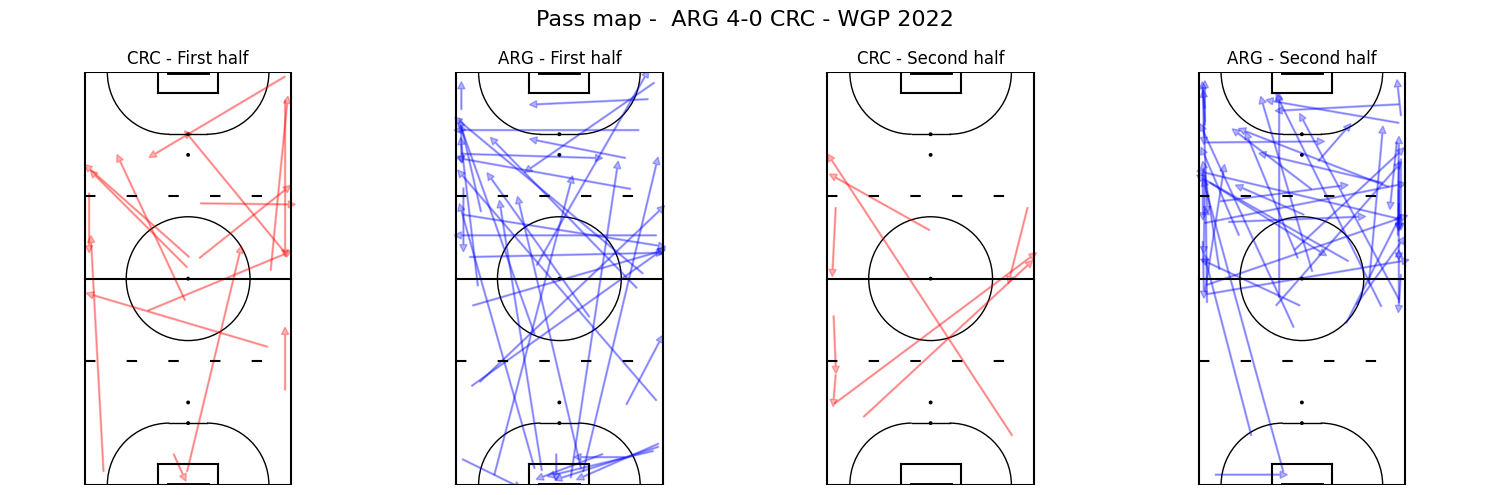

In [3]:
# Create the football pitch
pitch = BFpitch()

# Filter passes for each scenario
passes_arg_first_half = df[(df['Event'] == 'Pase ARG') & (df['Period'] == 'Primer tiempo')]
passes_crc_first_half = df[(df['Event'] == 'Pase CRC') & (df['Period'] == 'Primer tiempo')]
passes_arg_second_half = df[(df['Event'] == 'Pase ARG') & (df['Period'] == 'Segundo tiempo')]
passes_crc_second_half = df[(df['Event'] == 'Pase CRC') & (df['Period'] == 'Segundo tiempo')]

# Set up the subplot layout (1 row, 4 columns)
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Iterate over the subplots and plot in each one
for i, ax in enumerate(axes):
    
    # Draw the football pitch
    pitch.draw(ax=ax, orientation='vertical')
    
    # Select passes based on the position in the subplot matrix
    if i == 0:
        passes = passes_crc_first_half
        color = 'red'
        title = 'CRC - First half'
    elif i == 1:
        passes = passes_arg_first_half
        color = 'blue'
        title = 'ARG - First half'
    elif i == 2:
        passes = passes_crc_second_half
        color = 'red'
        title = 'CRC - Second half'
    elif i == 3:
        passes = passes_arg_second_half
        color = 'blue'
        title = 'ARG - Second half'
    
    # Iterate over the passes and plot with arrows
    for x in range(len(passes)):
        ax.arrow(
            passes['Xi'].iloc[x],
            passes['Yi'].iloc[x],
            passes['Xf'].iloc[x] - passes['Xi'].iloc[x],
            passes['Yf'].iloc[x] - passes['Yi'].iloc[x],
            color=color,
            width=0.1,  # Width of the arrow
            head_width=0.7,  # Width of the arrowhead
            head_length=0.7,  # Length of the arrowhead
            alpha=0.3
        )

    # Adjust the appearance of each subplot
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 40)
    ax.set_title(title)

# Adjust the general layout
plt.suptitle('Pass map -  ARG 4-0 CRC - WGP 2022', fontsize=16)  # Main title
plt.subplots_adjust(top=0.8)  # Adjust the position of the main title

# Adjust the general layout and display the plot
plt.tight_layout()
plt.show()


## Heat map

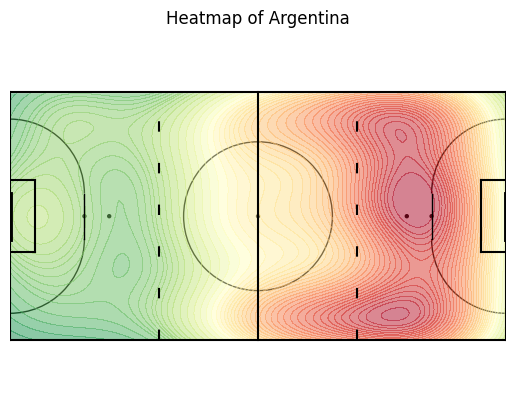

In [4]:
# Create the football pitch
pitch = BFpitch()
fig, ax = pitch.draw()

# Filter the DataFrame for attacks by Argentina with Xi and Yi greater than 0
events_arg = df[df['Event'].str.contains('ARG', case=False) & (df['Xi'] > 0) & (df['Yi'] > 0)]

# Create a heatmap using Seaborn for the filtered attacks by Argentina
kde = sns.kdeplot(
    data=events_arg,
    x='Yi',
    y='Xi',
    fill=True,
    thresh=0.05,
    alpha=0.5,
    levels=50,
    cmap='RdYlGn_r',
    ax=ax
)

# Adjust the appearance to display the plot within the pitch boundaries
rect1 = Rectangle((0, 20), 40, 10, color='white', alpha=1)
ax.add_patch(rect1)
rect2 = Rectangle((0, -10), 40, 10, color='white', alpha=1)
ax.add_patch(rect2)
plt.xlim(0, 40)
plt.ylim(0, 20)

plt.title('Heatmap of Argentina')

plt.show()
